<a href="https://colab.research.google.com/github/dmahoner/472_ML_WS5/blob/main/Hydrogenstoringipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Dataset Exploration

import the dataset

In [ ]:
import pandas as pd

# Replace 'path/to/your/file.xlsx' with the actual path to your file
file_path = '/content/Hydrogen storage dataset (1).xlsx'

# Read the XLSX file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame

                                          Unnamed: 0  \
0                                                NaN   
1                                      Material name   
2  Carbon nanotube functionalized with HNO3 at 80 °C   
3  Carbon nanotube functionalized with HNO3 at 80 °C   
4  Carbon nanotube functionalized with HNO3 at 80 °C   

                                      Input features  \
0  Functionalized carbonaceous nanomaterial prope...   
1                          Average crystal size (nm)   
2                                           3.780644   
3                                           3.780644   
4                                           3.780644   

                                    Input features.1  \
0  Functionalized carbonaceous nanomaterial prope...   
1                             Crystalinity index (%)   
2                                          82.394903   
3                                          82.394903   
4                                          82.

In [ ]:
# prompt: write code to tell the system that the data starts at row 3

import pandas as pd
df = pd.read_excel(file_path, header=2) # header=2 means row 3 will be the header
print(df.head())


                                       Material name  \
0  Carbon nanotube functionalized with HNO3 at 80 °C   
1  Carbon nanotube functionalized with HNO3 at 80 °C   
2  Carbon nanotube functionalized with HNO3 at 80 °C   
3  Carbon nanotube functionalized with HNO3 at 80 °C   
4  Carbon nanotube functionalized with HNO3 at 80 °C   

   Average crystal size (nm)  Crystalinity index (%)  \
0                   3.780644               82.394903   
1                   3.780644               82.394903   
2                   3.780644               82.394903   
3                   3.780644               82.394903   
4                   3.780644               82.394903   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                     125.2                1.018            298.0   
1                     125.2                1.018            298.0   
2                     125.2                1.018            298.0   
3                     125.2                1.018  

Identifying missing values

In [ ]:
# prompt: write code to look for missing values

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64


Replace missing values

In [ ]:
# prompt: write code to look for missing values

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64


In [ ]:
# prompt: write code to replace the missing values with the average in its column

# Replace missing values with the column average
for column in df.columns:
  if df[column].isnull().any():
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

# Verify that there are no more missing values
missing_values_after_replacement = df.isnull().sum()
print("\nMissing values after replacement:")
print(missing_values_after_replacement)


Missing values after replacement:
Material name                       0
Average crystal size (nm)           0
Crystalinity index (%)              0
 BET surface area (m²/g)            0
Pore volume (cm³/g)                 0
Temperature (K)                     0
Pressure (bar)                      0
Hydrogen uptake/adsorption (wt%)    0
Hydrogen desorption (wt%)           0
dtype: int64


In [ ]:
# prompt: replace missing values with 0

# Replace missing values with 0
#df_filled = df.fillna(0)

# Verify that missing values have been replaced
#missing_values_after_fill = df_filled.isnull().sum()
#print("\nMissing values after filling with 0:")
#print(missing_values_after_fill)


Identify data types

In [ ]:
# prompt: write code to identify data types

# Check data types of each column
data_types = df.dtypes

# Print the data types
print("\nData types of each column:")
print(data_types)



Data types of each column:
Material name                        object
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                       object
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


Basic Statistics

In [ ]:
# prompt: write code to compute basic statistics

# Compute basic statistics for numerical columns
numerical_stats = df.describe()

# Print the statistics
print("\nBasic statistics for numerical columns:")
print(numerical_stats)

# Compute value counts for categorical columns
for column in df.columns:
  if df[column].dtypes == 'object': # Access dtypes attribute of the Series
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())


Basic statistics for numerical columns:
       Average crystal size (nm)  Crystalinity index (%)  \
count                 539.000000              539.000000   
mean                    8.166266               49.162962   
std                     4.560454               16.764251   
min                     2.977754               18.900143   
25%                     3.669600               36.381961   
50%                     9.032235               52.881608   
75%                    12.543453               62.089987   
max                    15.712170               82.394903   

        BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
count                539.000000           539.000000       539.000000   
mean                 258.195065             0.838367       246.267191   
std                  214.466418             0.609617       152.823071   
min                   39.200000             0.021000        77.000000   
25%                   89.060000             0.307000 

Data Visualization

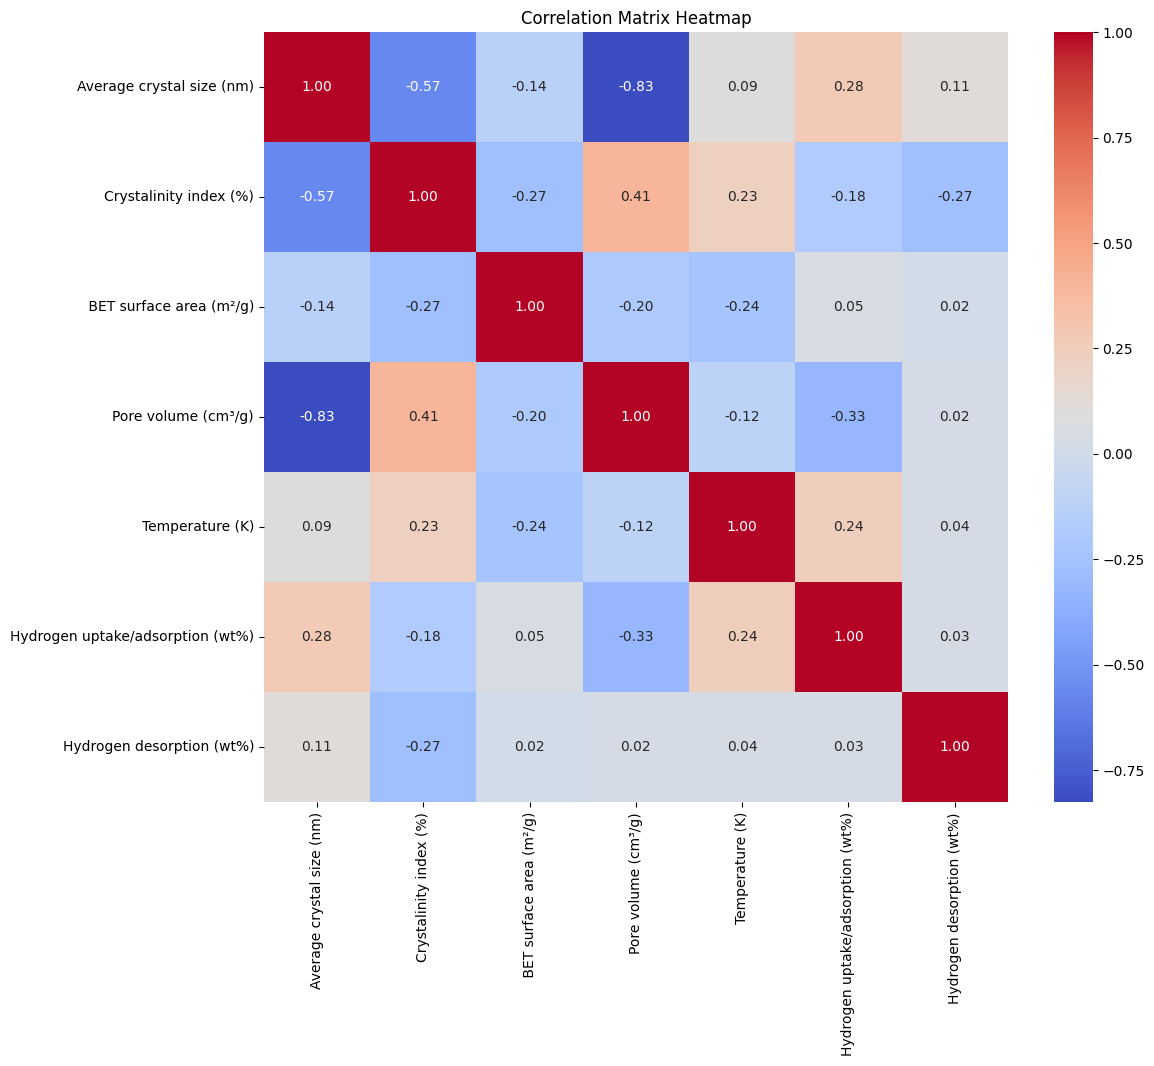

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Part 2

Import needed databases/ libraries

In [ ]:
!pip install shap -q


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap


Replace missing values with 0

In [ ]:
# prompt: write code to fill in missing values with 0

# Fill missing values with 0
df_filled = df.fillna(0)

# Print the DataFrame with missing values filled
print(df_filled.head())

# Check for missing values again
missing_values_after_fill = df_filled.isnull().sum()
print("Missing values per column after filling:")
print(missing_values_after_fill)


                                       Material name  \
0  Carbon nanotube functionalized with HNO3 at 80 °C   
1  Carbon nanotube functionalized with HNO3 at 80 °C   
2  Carbon nanotube functionalized with HNO3 at 80 °C   
3  Carbon nanotube functionalized with HNO3 at 80 °C   
4  Carbon nanotube functionalized with HNO3 at 80 °C   

   Average crystal size (nm)  Crystalinity index (%)  \
0                   3.780644               82.394903   
1                   3.780644               82.394903   
2                   3.780644               82.394903   
3                   3.780644               82.394903   
4                   3.780644               82.394903   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                     125.2                1.018            298.0   
1                     125.2                1.018            298.0   
2                     125.2                1.018            298.0   
3                     125.2                1.018  

In [ ]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [ ]:
# drop duplicates
data = df.drop_duplicates()

In [ ]:
import pandas as pd

def one_hot_encode_objects(file_path, header_rows=2):
    """
    One-hot encodes categorical variables that are objects in an Excel file, skipping the specified header rows.

    Args:
        file_path: The path to the Excel file.
        header_rows: The number of rows to skip as headers.

    Returns:
        The DataFrame with one-hot encoded columns.
    """

    # Read the Excel file, skipping the header rows
    df = pd.read_excel(file_path, header=header_rows)

    # Identify categorical columns with object data type
    categorical_cols = df.select_dtypes(include='object').columns

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    return df_encoded

# Example usage
# Assuming your data is in an Excel file named 'data.xlsx'
df_encoded = one_hot_encode_objects(file_path)
print(df_encoded)


     Average crystal size (nm)  Crystalinity index (%)  \
0                     3.780644               82.394903   
1                     3.780644               82.394903   
2                     3.780644               82.394903   
3                     3.780644               82.394903   
4                     3.780644               82.394903   
..                         ...                     ...   
534                   3.969572               36.381961   
535                   3.969572               36.381961   
536                   3.969572               36.381961   
537                   3.969572               36.381961   
538                   3.969572               36.381961   

      BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                       125.2                1.018           298.00   
1                       125.2                1.018           298.00   
2                       125.2                1.018           298.00   
3                  

In [ ]:
# prompt: write code to replace the missing values with the average in its column

# Replace missing values with the column average
for column in df.columns:
  if df[column].isnull().any():
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

# Verify that there are no more missing values
missing_values_after_replacement = df.isnull().sum()
print("\nMissing values after replacement:")
print(missing_values_after_replacement)


Missing values after replacement:
Material name                       0
Average crystal size (nm)           0
Crystalinity index (%)              0
 BET surface area (m²/g)            0
Pore volume (cm³/g)                 0
Temperature (K)                     0
Pressure (bar)                      0
Hydrogen uptake/adsorption (wt%)    0
Hydrogen desorption (wt%)           0
dtype: int64


In [ ]:
def ml_models(file_path, header_rows=2):
    import pandas as pd
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    try:
        # Load the data
        data = pd.read_excel(file_path, header=header_rows)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"Error loading data: {e}")
        return

    print(f"Data shape: {data.shape}")
    print("Column names:", data.columns.tolist())  # Print actual column names

    try:
        # Prepare features and target variables
        columns_to_drop = ['Pressure (bar)', 'Temperature (K)', 'Pore volume (cm³/g)',
                           'BET surface area (m²/g)', 'Crystalinity index (%)',
                           'Average crystal size (nm)']

        # Drop only existing columns
        X = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)
        Y = data[['Hydrogen desorption (wt%)', 'Hydrogen uptake/adsorption (wt%)']]

        # Check for NaN values in target variable
        if Y.isnull().values.any():
            print("NaN values found in target variable. Dropping rows with NaN values.")
            data = data.dropna(subset=['Hydrogen desorption (wt%)', 'Hydrogen uptake/adsorption (wt%)'])
            X = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)
            Y = data[['Hydrogen desorption (wt%)', 'Hydrogen uptake/adsorption (wt%)']]
    except KeyError as e:
        print(f"Error with column names: {e}")
        return

    # Select only numerical columns (excluding 'object' type)
    X = X.select_dtypes(exclude=['object'])
    print(f"Feature set shape: {X.shape}, Target set shape: {Y.shape}")

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    print("Data split into training and testing sets.")

    # Check shapes of training data
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # Initialize models with hyperparameter grids
    models = {
        'Random Forest': (RandomForestRegressor(), {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }),
        'Decision Tree': (DecisionTreeRegressor(), {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }),
        'XGBoost': (XGBRegressor(), {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }),
    }

    # Train and evaluate each model with hyperparameter tuning
    for name, (model, params) in models.items():
        print(f"Training model: {name}...")
        try:
            grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', verbose=1, error_score='raise')
            grid_search.fit(X_train, y_train)

            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)

            print(f"{name} Best Parameters: {grid_search.best_params_}")
            print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}\n")
        except Exception as e:
            print(f"Error training {name}: {e}")

# Call the function with the path to your Excel file
ml_models('/content/Hydrogen storage dataset (1).xlsx')  # Use the correct path


Data loaded successfully.
Data shape: (539, 9)
Column names: ['Material name', 'Average crystal size (nm)', 'Crystalinity index (%)', ' BET surface area (m²/g)', 'Pore volume (cm³/g)', 'Temperature (K)', 'Pressure (bar)', 'Hydrogen uptake/adsorption (wt%)', 'Hydrogen desorption (wt%)']
NaN values found in target variable. Dropping rows with NaN values.
Feature set shape: (35, 3), Target set shape: (35, 2)
Data split into training and testing sets.
X_train shape: (28, 3), y_train shape: (28, 2)
Training model: Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Mean Squared Error: 0.001, R² Score: 0.980, MAE: 0.019

Training model: Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Mean Squared Error: 0.001, R² Score: 0.792, MAE: 0.022

Traini

Feature Importance Analysis

In [ ]:

# Separate features (X) and select one target column (y)
X = data.drop(['Pressure (bar)', 'Temperature (K)', 'Pore volume (cm³/g)', 'Crystalinity index (%)', 'Average crystal size (nm)'], axis=1)

# Choose one target column for logistic regression
y = data['Hydrogen desorption (wt%)']  # Select one column

# Drop rows with NaN in both X and y
X = X.dropna()
y = y.dropna()

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing, then trains the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Set up hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# **Permutation Importance**
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance (Decrease in Accuracy)")
plt.title("Feature Importance using Permutation Importance")
plt.show()

# **SHAP Values**
# Use the preprocessor to transform X_train for SHAP
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model.named_steps['classifier'], X_train_transformed)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=X.columns)


ValueError: Found input variables with inconsistent numbers of samples: [35, 151]

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

# Separate features (X) and select one target column (y)
X = data.drop(['Pressure (bar)', 'Temperature (K)', 'Pore volume (cm³/g)', 'Crystalinity index (%)', 'Average crystal size (nm)'], axis=1)

# Choose one target column for logistic regression
y = data['Hydrogen desorption (wt%)']  # Select one column

# Drop rows with NaN in both X and y
X = X.dropna()
y = y.dropna()

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing, then trains the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Set up hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# **Permutation Importance**
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance (Decrease in Accuracy)")
plt.title("Feature Importance using Permutation Importance")
plt.show()

# **SHAP Values**
# Use the preprocessor to transform X_train for SHAP
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model.named_steps['classifier'], X_train_transformed)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=X.columns)


ValueError: Found input variables with inconsistent numbers of samples: [35, 151]

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame

# Separate features (X) and select one target column (y)
X = data.drop(['Pressure (bar)', 'Temperature (K)', 'Pore volume (cm³/g)', 'Crystalinity index (%)', 'Average crystal size (nm)'], axis=1)

# Choose one target column for logistic regression
y = data['Hydrogen desorption (wt%)']  # Select one column

# Drop rows with NaN in both X and y (this ensures consistent lengths)
X = X.loc[y.notna()].dropna()  # Drop NaN from X based on y's NaN
y = y.dropna()  # Drop NaN from y

# Ensure that X and y are aligned after dropping NaNs
X = X.loc[y.index]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing, then trains the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Set up hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# **Permutation Importance**
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance (Decrease in Accuracy)")
plt.title("Feature Importance using Permutation Importance")
plt.show()

# **SHAP Values**
# Use the preprocessor to transform X_train for SHAP
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model.named_steps['classifier'], X_train_transformed)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=X.columns)


KeyError: '[83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 286, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 511, 512, 513, 514, 515, 516, 517, 518, 532, 533, 534, 535, 536, 537, 538] not in index'

In [ ]:

# Assume `data` is your DataFrame

# Separate features (X) and select one target column (y)
X = data.drop(['Pressure (bar)', 'Temperature (K)', 'Pore volume (cm³/g)', 'Crystalinity index (%)', 'Average crystal size (nm)'], axis=1)

# Choose one target column for logistic regression
y = data['Hydrogen desorption (wt%)']  # Select one column

# Drop rows with NaN in X or y to ensure they are aligned
valid_indices = X.index[y.notna()]
X = X.loc[valid_indices]
y = y.loc[valid_indices]  # Align y based on valid indices

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing, then trains the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Set up hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# **Permutation Importance**
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance (Decrease in Accuracy)")
plt.title("Feature Importance using Permutation Importance")
plt.show()

# **SHAP Values**
# Use the preprocessor to transform X_train for SHAP
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model.named_steps['classifier'], X_train_transformed)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=X.columns)
